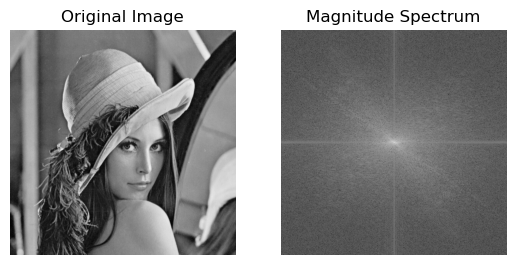

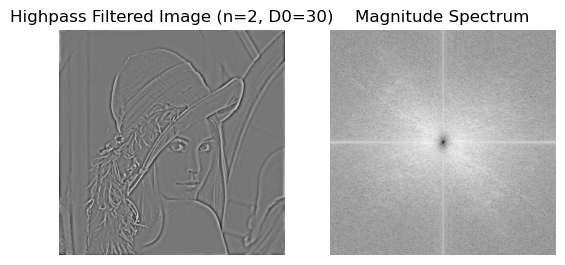

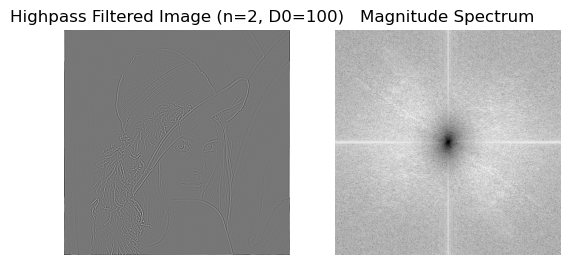

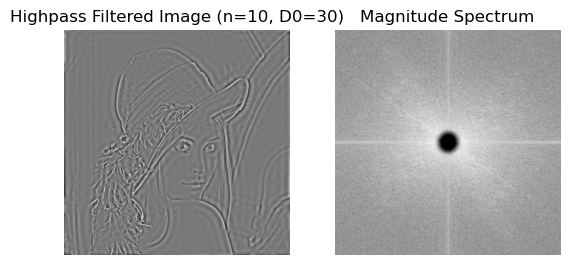

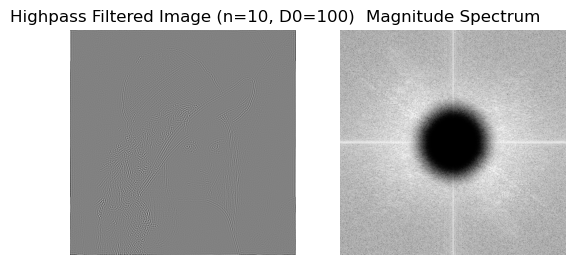

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def butterworthLowpassFilter(img, D0, n):
    h, w = img.shape
    u = np.arange(-h // 2, h // 2)
    v = np.arange(-w // 2, w // 2)
    U, V = np.meshgrid(u, v)
    D = np.sqrt(U ** 2 + V ** 2)
    H = 1 / (1 + (D / D0) ** (2 * n))
    img_shifted = np.fft.fftshift(np.fft.fft2(img))
    filtered_img = img_shifted * H
    filtered_img_spatial = np.fft.ifft2(np.fft.ifftshift(filtered_img)).real
    return filtered_img_spatial

def butterworthHighpassFilter(img, D0, n):
    lowpass_filtered_img = butterworthLowpassFilter(img, D0, n)
    highpass_filtered_img = img - lowpass_filtered_img
    return highpass_filtered_img

def show_image_and_spectrum(img, title):
    plt.figure()
    plt.subplot(121)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

    plt.subplot(122)
    magnitude_spectrum = np.log(1 + np.abs(np.fft.fftshift(np.fft.fft2(img))))
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Magnitude Spectrum')
    plt.axis('off')
    plt.show()

img = cv2.imread('Lenna.png', cv2.IMREAD_GRAYSCALE)
show_image_and_spectrum(img, 'Original Image')

params = [(2, 30), (2, 100), (10, 30), (10, 100)]

for n, D0 in params:
    filtered_img = butterworthHighpassFilter(img, D0, n)
    show_image_and_spectrum(filtered_img, f'Highpass Filtered Image (n={n}, D0={D0})')
